# LangGraph Basic Chatbot Tutorial
### Building Your First LangGraph Application

Welcome to this hands-on tutorial where you'll build a basic chatbot using LangGraph! This tutorial is based on the [official LangGraph documentation](https://langchain-ai.github.io/langgraph/tutorials/get-started/1-build-basic-chatbot/) and is designed to give you a solid foundation in LangGraph concepts.

## 🎯 Learning Objectives

By the end of this tutorial, you will:
- ✅ Understand what LangGraph is and why it's useful
- ✅ Know how to create and structure a StateGraph
- ✅ Learn about nodes, edges, and state management
- ✅ Build a functional chatbot from scratch
- ✅ Understand the basic LangGraph workflow

## 📋 What We'll Build

We'll create a simple chatbot that:
- Maintains conversation state
- Responds to user messages using an LLM
- Demonstrates core LangGraph concepts
- Forms the foundation for more advanced features

Let's get started! 🚀


## Prerequisites

Before we start, make sure you have:

1. **Python 3.8+** installed on your system
2. **Access to an LLM provider** that supports tool-calling features:
   - OpenAI (GPT-4, GPT-3.5-turbo)
   - Anthropic (Claude)
   - Google Gemini
   - Azure OpenAI
   - AWS Bedrock

3. **API credentials** for your chosen LLM provider
4. **Basic Python knowledge** - understanding of functions, dictionaries, and classes

> **💡 Tip:** We recommend starting with OpenAI or Anthropic as they have excellent tool-calling capabilities and extensive documentation.


### Install the required Packages

In [1]:
!pip install langgraph langsmith

!pip install -U "langchain[openai]"

!pip install -U "langchain[anthropic]"




### 📚 About LangSmith

**LangSmith** is LangChain's observability platform that helps you:
- **Debug** your LangGraph applications
- **Monitor** performance and costs
- **Test** and evaluate your AI systems
- **Trace** execution flows

> **💡 Pro Tip:** Sign up for [LangSmith](https://langsmith.langchain.com/) to get detailed insights into your LangGraph applications. It's invaluable for development and debugging!


### Step 2: Create StateGraph

In [9]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages





In [10]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [11]:
graph_builder= StateGraph(State)

### Step -3 Set up of Language Model

In [ ]:
import os 
from langchain.chat_models import init_chat_model


os.environ["OPENAI_API_KEY"] = ""
llm = init_chat_model("openai:gpt-4")

In [13]:
llm.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'id': 'chatcmpl-BlBUzNmvhY2b06aoabSCl5jzogKpK', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--f4e9abf6-43eb-42e0-bc1f-17085d2051d8-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## Step 4: Add a Node

Now we'll add our first node to the graph. **Nodes** represent units of work and are typically regular Python functions.

### 🔧 Understanding Nodes

- **Input**: Nodes receive the current `State`
- **Processing**: They perform some work (like calling an LLM)
- **Output**: They return a dictionary with state updates
- **Pattern**: All LangGraph node functions follow this pattern


In [14]:
def chatbot(state: State):
    response = llm.invoke(state['messages'])
    return {"messages": [response]}
    

               

In [15]:
graph_builder.add_node("node_1",chatbot)
graph_builder.add_edge(START,"node_1")

graph_builder.add_edge("node_1", END)

graph = graph_builder.compile()


📊 Graph Visualization:
ASCII visualization not available: Install grandalf to draw graphs: `pip install grandalf`.
Simple Graph Structure:
┌─────────┐
│  START  │
└────┬────┘
     │
     ▼
┌─────────┐
│ chatbot │
└─────────┘



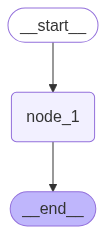

🎨 Professional diagram displayed above!

✅ Graph structure visualized!
📈 Our simple chatbot has one node connected to START


In [16]:
# Visualize our graph structure
print("📊 Graph Visualization:")
print("=" * 30)

# ASCII visualization (always works)
try:
    ascii_viz = graph.get_graph().draw_ascii()
    print(ascii_viz)
except Exception as e:
    print("ASCII visualization not available:", e)
    # Fallback simple visualization
    print("Simple Graph Structure:")
    print("┌─────────┐")
    print("│  START  │")
    print("└────┬────┘")
    print("     │")
    print("     ▼")
    print("┌─────────┐")
    print("│ chatbot │")
    print("└─────────┘")

print("\n" + "=" * 30)

# Try to display a more professional diagram (if dependencies are available)
try:
    from IPython.display import Image, display
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("🎨 Professional diagram displayed above!")
except Exception as e:
    print("🎨 Professional visualization not available (this is normal)")
    print("💡 To enable: pip install 'langgraph[visualization]'")

print("\n✅ Graph structure visualized!")
print("📈 Our simple chatbot has one node connected to START")


In [17]:
def stream_graph_updates(user_input: str):
    """
    Stream updates from our graph execution.
    
    This function:
    1. Creates initial state with user message
    2. Streams graph execution results
    3. Displays assistant responses
    
    Args:
        user_input: The user's message
    """
    print(f"\n👤 User: {user_input}")
    print("🔄 Processing...")
    
    # Create initial state with user message
    initial_state = {
        "messages": [{"role": "user", "content": user_input}]
    }
    
    # Stream the graph execution
    for event in graph.stream(initial_state):
        for value in event.values():
            # Get the latest message (assistant's response)
            if value["messages"]:
                latest_message = value["messages"][-1]
                print(f"🤖 Assistant: {latest_message.content}")

# Test our chatbot with some sample interactions
print("🚀 Testing our LangGraph chatbot:")
print("=" * 50)


🚀 Testing our LangGraph chatbot:


In [18]:
stream_graph_updates("Hello")


👤 User: Hello
🔄 Processing...
🤖 Assistant: Hello! How can I assist you today?



In [19]:
stream_graph_updates("which number is bigger 10.5 and 10.1")


👤 User: which number is bigger 10.5 and 10.1
🔄 Processing...
🤖 Assistant: 10.5 is bigger than 10.1.


In [20]:
def book_ticket(input1):
    return input1 + " from book ticket function"

def book_hotel(input2):
    return input2 + " from book_hotel function"

In [21]:
book_ticket("rajesh")

'rajesh from book ticket function'

In [22]:
book_hotel("Thakur")

'Thakur from book_hotel function'

In [24]:
from langgraph.graph import Graph
workflow1 = Graph()

In [25]:
workflow1.add_node("BookTicket", book_ticket)
workflow1.add_node("BookHotel", book_hotel)

In [26]:
workflow1.add_edge("BookTicket", "BookHotel")

In [27]:
workflow1.set_entry_point("BookTicket")
workflow1.set_finish_point("BookHotel")
app1 = workflow1.compile()


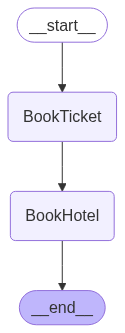

In [28]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [29]:
app1.invoke("Hi This is Rajesh")


'Hi This is Rajesh from book ticket function from book_hotel function'

In [30]:
input = "hi this is Rajesh "
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from BookTicket
_______
hi this is Rajesh  from book ticket function


here is output from BookHotel
_______
hi this is Rajesh  from book ticket function from book_hotel function


